<a href="https://colab.research.google.com/github/AbdullatifHabiba/Speech-Emotion-Recognition/blob/main/Speech_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from zipfile import ZipFile
import numpy as np
import pandas as pd
import random
import numpy as np
import scipy as sc
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn import cluster
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import urllib.request
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import librosa
from tensorflow.keras.layers import Conv2D, Input
from sklearn import preprocessing

In [ ]:
!pip install ltlf2dfa


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 6.7 MB/s eta 0:00:00


In [ ]:
from ltlf2dfa.parser.ltlf import LTLfParser

parser = LTLfParser()
formula_str = "G(a -> X b)"
formula = parser(formula_str)       # returns an LTLfFormula

print(formula)

G((a -> X(b)))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with ZipFile("/content/drive/MyDrive/Crema.zip", "r") as folders:
  folders.extractall("Crema")

# Download the Dataset

In [ ]:
Data = []
data_path = 'Crema/Crema'
data_label = []

# Loop over all audio files in the dataset
for file_name in os.listdir(data_path):
    if file_name.endswith('.wav'):
        file_path = os.path.join(data_path, file_name)

        # Extract the emotion label from the filename
        emotion_label = file_name.split('_')[2]
        data_label.append(emotion_label)
        # Load audio waveform
        audio, sr = librosa.load(file_path, sr=22050)
        Data.append(audio)
        #Plot the waveform
        # plt.figure(figsize=(12, 4))
        # plt.plot(audio)
        # plt.title('Waveform')
        # plt.xlabel('Time (seconds)')
        # plt.ylabel('Amplitude')
        # plt.show()


#Feature Space

In [ ]:
# Get the maximum length of the rows
max_len = max([len(row) for row in Data])
min_len = min(([len(row) for row in Data]))
print(max_len, min_len)

arr_fixed = [[1 for j in range(min_len)] for i in range(len(Data))]
#arr_fixed=np.array(arr_fixed)
for i in range(len(Data)):
    row = Data[i][:min_len]
    arr_fixed[i] = row

110361 27959


In [ ]:
arr_fixed = np.array(arr_fixed)
print(np.shape(arr_fixed))

(14884, 27959)


In [ ]:
print(np.shape(arr_fixed))

(14884, 27959)


In [ ]:
zcr = librosa.feature.zero_crossing_rate(arr_fixed[5])
frame_length = len(arr_fixed[5])
print(len(arr_fixed[5]))
energies = librosa.feature.rms(y=arr_fixed[5], frame_length=frame_length)
print(np.shape(energies[0]),energies[0])
result =zcr[0]+energies[0]

27959
(55,) [0.1759675  0.17607659 0.17630567 0.17642209 0.17647474 0.17650895
 0.17652175 0.17657965 0.17728147 0.17803589 0.1842022  0.20414458
 0.21870649 0.23093447 0.23741007 0.24190865 0.24470696 0.24558015
 0.24768582 0.25440523 0.26469818 0.27120647 0.27334055 0.2744674
 0.27558994 0.2789609  0.2807285  0.28119865 0.2813855  0.281385
 0.28138447 0.28138348 0.2813829  0.28138185 0.28137997 0.28137702
 0.2813725  0.28137082 0.28136843 0.2813667  0.2810522  0.27503294
 0.27018166 0.26653928 0.26522154 0.26474598 0.26446876 0.25942644
 0.24639408 0.23585516 0.22640225 0.22308494 0.22104461 0.22047566
 0.21984121]


In [ ]:
print(len(arr_fixed))
ZeroCrossingRateArr = []
energiesArr = []
Result = []
for i in range(len(arr_fixed)):
  #print(i)
  zcr = librosa.feature.zero_crossing_rate(arr_fixed[i])
  frame_length = len(arr_fixed[i])
  ZeroCrossingRateArr.append(zcr[0])
  energy = librosa.feature.rms(y = arr_fixed[i], frame_length = frame_length)
  energiesArr.append(energy[0]);
  Result.append(zcr[0] + energy[0])

14884


KeyboardInterrupt: ignored

In [ ]:
Result = np.array(Result)

In [ ]:
print(np.shape(Result))

(7442, 55)


#Not enterested

In [ ]:
# here a way to make feature matrix
# Calculate summary statistics of zero crossing rate and energy features
zcr_means = []
zcr_medians = []
zcr_variances = []
energy_means = []
energy_medians = []
energy_variances = []

for i in range(len(ZeroCrossingRateArr)):
    zcr_means.append(np.mean(ZeroCrossingRateArr[i]))
    zcr_medians.append(np.median(ZeroCrossingRateArr[i]))
    zcr_variances.append(np.var(ZeroCrossingRateArr[i]))

    energy_means.append(np.mean(energiesArr[i]))
    energy_medians.append(np.median(energiesArr[i]))
    energy_variances.append(np.var(energiesArr[i]))

# Create feature space from summary statistics
feature_matrix = np.column_stack((zcr_means, zcr_medians, zcr_variances, energy_means, energy_medians, energy_variances))
"""
The code I provided for calculating the zero crossing
rate works on the time domain of the audio signal.
It calculates the rate of sign changes of the signal during
the duration of a particular frame, which is a time-based feature.
The librosa.feature.zero_crossing_rate()
function returns a 2D numpy array where each column corresponds to one frame
of the audio signal, and each row corresponds to one channel if the signal
is not mono.

If you want to calculate the zero crossing rate
in the frequency domain instead, you can use the Short-Time Fourier Transform
(STFT) to convert the audio signal from the time domain to the
frequency domain. Then, you can calculate the zero crossing rate of
each frequency bin in the magnitude spectrum.
"""

In [ ]:
mel_arr = []
for audio in Data:
    mel = librosa.feature.melspectrogram(y=audio, sr=22050)
    mel_arr.append(mel)

mel_mean = np.mean(mel_arr, axis=1)
mel_median = np.median(mel_arr, axis=1)
mel_var = np.var(mel_arr, axis=1)

# create Mel spectrogram feature space by concatenating mean, median, and variance features
mel_feature_space = np.concatenate((mel_mean, mel_median, mel_var), axis=1)

In [ ]:
flatness_arr = []
for audio in Data:
    flatness = librosa.feature.spectral_flatness(y=audio)
    flatness_arr.append(flatness)

flatness_mean = np.mean(flatness_arr, axis=1)
flatness_median = np.median(flatness_arr, axis=1)
flatness_var = np.var(flatness_arr, axis=1)

flatness_feature_space = np.column_stack((flatness_mean, flatness_median, flatness_var))

In [ ]:
centroid_arr = []
for audio in Data:
    centroid = librosa.feature.spectral_centroid(y=audio)
    centroid_arr.append(centroid)

centroid_mean = np.mean(centroid_arr, axis=1)
centroid_median = np.median(centroid_arr, axis=1)
centroid_var = np.var(centroid_arr, axis=1)

centroid_feature_space = np.column_stack((centroid_mean, centroid_median, centroid_var))

In [ ]:
mfccs_arr = []
for audio in Data:
    mfccs = librosa.feature.mfcc(y=audio, sr=22050, n_mfcc=20)
    mfccs_arr.append(mfccs)

mfcc_mean = np.mean(mfccs_arr, axis=2)
mfcc_median = np.median(mfccs_arr, axis=2)
mfcc_var = np.var(mfccs_arr, axis=2)

mfcc_feature_space = np.concatenate((mfcc_mean, mfcc_median, mfcc_var), axis=1)

# SpectoGram

In [ ]:
n_mels = 256
n_fft = 4096
hop_length = 1024
n_frames = 61
sr=22050
Spect_data = []

In [ ]:

def mel_spect_data(audio,sr):

    audio_dur = len(audio)/sr
    frame_step = audio_dur / n_frames
    hop_length=int(round(frame_step * sr))
    mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr ,n_mels=n_mels,n_fft=n_fft,hop_length = hop_length)
    if mel_spec.shape[1] >= n_frames:
      mel_spec = mel_spec[:, :n_frames]
    else:
      pad_width = n_frames - mel_spec.shape[1]
      mel_spec = np.pad(mel_spec, ((0,0), (0,pad_width)), 'constant')

    mel_spec_db = librosa.power_to_db(mel_spec, ref = np.max)
    Spect_data.append(mel_spec_db.T[:, :, np.newaxis])


In [ ]:

for element in Data:
  mel_spect_data(element,sr)
Spect_data = np.array(Spect_data) / -80.0

#Split Data for Spectogram

In [ ]:
unique_labels=(np.unique(data_label))
print(unique_labels)

['ANG' 'DIS' 'FEA' 'HAP' 'NEU' 'SAD']


In [ ]:
unique_labels = (np.unique(data_label))
print(unique_labels)
Data = []
# print(Spect_data,'\n',data_label)
X_train, X_test, y_train, y_test = train_test_split(Spect_data, data_label, test_size=0.3, random_state=42,shuffle=True,stratify=None)

X_train, X_Validation, y_train, y_Validation = train_test_split(X_train, y_train, test_size=0.05, random_state=42,shuffle=True,stratify=None)

X_train = np.array(X_train);
X_Validation = np.array( X_Validation)
y_train = np.array(y_train)
y_Validation = np.array(y_Validation)
y_test = np.array(y_test)
X_test = np.array(X_test)

y_train_num=np.array([0 for i in range(len(y_train))])
for i in range(len(y_train)):
  y_train_num[i] = int(np.where(unique_labels == y_train[i])[0][0])

y_test_num=np.array([0 for i in range(len(y_test))])
for i in range(len(y_test)):
  y_test_num[i]=int(np.where(unique_labels ==y_test[i])[0][0])

y_Validation_num=np.array([0 for i in range(len(y_Validation))])
for i in range(len(y_Validation)):
  y_Validation_num[i]=int(np.where(unique_labels ==y_Validation[i])[0][0])

print(y_train_num,'\n',y_test_num,'\n',y_Validation_num)

['ANG' 'DIS' 'FEA' 'HAP' 'NEU' 'SAD']
[4 2 3 ... 0 3 3] 
 [1 0 3 ... 2 3 3] 
 [1 3 3 1 3 4 0 3 1 0 5 4 4 3 3 2 3 5 3 1 1 0 4 2 5 2 3 3 2 4 3 1 4 1 2 3 0
 3 1 4 3 3 5 3 3 0 1 4 5 2 3 1 5 5 5 3 1 0 2 1 2 2 5 5 2 2 4 3 5 0 1 2 3 4
 3 0 0 3 5 0 2 1 3 1 3 2 5 2 5 3 3 1 1 5 5 1 1 5 5 1 2 4 1 3 0 0 2 2 3 3 0
 5 5 5 1 1 3 5 2 1 0 1 5 5 2 1 2 3 1 0 1 1 4 4 1 1 2 4 3 5 1 4 2 0 2 5 2 3
 2 1 0 5 3 3 4 5 5 5 1 1 2 4 5 4 4 1 5 1 1 1 2 4 4 3 4 0 0 4 0 1 5 5 2 3 0
 3 1 3 2 5 0 4 5 1 5 4 3 1 4 5 2 2 2 1 2 3 0 2 0 0 1 3 2 1 5 0 4 0 5 5 4 5
 5 1 1 3 2 1 3 2 1 3 1 1 3 2 0 1 1 1 3 3 1 2 5 2 2 0 0 1 3 1 4 5 4 0 4 3 5
 3 4]


# CNN For melspectogram feature space

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Define the filepath for the saved models
filepath = "best_model.h5"

# Create a ModelCheckpoint callback to save the best model based on validation loss
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# Add the callback to the list of callbacks for the model.fit() method
callbacks_list = [checkpoint]


input_shape = (None, n_frames, n_mels)
# define the model architecture

model = models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(n_frames, n_mels, 1)),
   layers. MaxPooling2D((2, 2)),
   layers. Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
  layers.  MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
  layers.  MaxPooling2D((2, 2)),
   layers. Flatten(),
  layers.  Dense(512, activation='relu'),
   layers. Dense(6, activation='softmax')
])

#compile the model
model.compile(optimizer=Adam(lr=.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


model.fit(X_train,y_train_num,batch_size=64,epochs=11, validation_data=(X_Validation, y_Validation_num),  callbacks=callbacks_list)

Epoch 1/11


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


78/78 [==============================] - ETA: 0s - loss: 1.7254 - accuracy: 0.2458
Epoch 1: val_loss improved from inf to 1.57133, saving model to best_model.h5
78/78 [==============================] - 180s 2s/step - loss: 1.7254 - accuracy: 0.2458 - val_loss: 1.5713 - val_accuracy: 0.3448
Epoch 2/11
78/78 [==============================] - ETA: 0s - loss: 1.4938 - accuracy: 0.3927
Epoch 2: val_loss improved from 1.57133 to 1.44275, saving model to best_model.h5
78/78 [==============================] - 179s 2s/step - loss: 1.4938 - accuracy: 0.3927 - val_loss: 1.4428 - val_accuracy: 0.4138
Epoch 3/11
78/78 [==============================] - ETA: 0s - loss: 1.4406 - accuracy: 0.4212
Epoch 3: val_loss improved from 1.44275 to 1.42125, saving model to best_model.h5
78/78 [==============================] - 195s 3s/step - loss: 1.4406 - accuracy: 0.4212 - val_loss: 1.4213 - val_accuracy: 0.4215
Epoch 4/11
78/78 [==============================] - ETA: 0s - loss: 1.3447 - accuracy: 0.4731
Epo

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Define the filepath for the saved models
filepath = "best_model.h5"

# Create a ModelCheckpoint callback to save the best model based on validation loss
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# Add the callback to the list of callbacks for the model.fit() method
callbacks_list = [checkpoint]


input_shape = (None, n_frames, n_mels)
#define the model architecture
# model = models.Sequential([
#   layers.Conv2D(32,  kernel_size=(3, 3),strides=(1, 1), activation='relu',input_shape=(n_frames, n_mels,1)),
#   layers.Conv2D(32,  kernel_size=(3,3),strides=(1, 1), activation='relu'),
#   layers.MaxPooling2D((3, 3),strides=(2, 2)),
#   layers.Conv2D(64, (3, 3), activation='relu'),
#   layers.Conv2D(64, (3, 3), activation='relu'),
#   layers.MaxPooling2D((3, 3),strides=(2, 2)),
#   layers.Conv2D(128, (3, 3), activation='relu'),
#   layers.Conv2D(128, (3, 3), activation='relu'),
#   layers.MaxPooling2D((3, 3),strides=(2, 2)),
#   # layers.Conv2D(256, (3, 3), activation='relu'),
#   # layers.Conv2D(256, (3, 3), activation='relu'),
#   # layers.MaxPooling2D((3, 3),strides=(1, 1)),
#   layers.Flatten(),
#   layers.Dense(256, activation='relu'),
#   layers.Dense(64, activation='relu'),########
#   layers.Dense(32, activation='relu'),#########
#   layers.Dense(6),
#   layers.Activation('softmax')
# ])
model = models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(n_frames, n_mels, 1)),
   layers. MaxPooling2D((2, 2)),
   layers. Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
  layers.  MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
  layers.  MaxPooling2D((2, 2)),
   layers. Flatten(),
  layers.  Dense(512, activation='relu'),
   layers. Dense(6, activation='softmax')
])

#compile the model
model.compile(optimizer=Adam(lr=.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#print(len(X_train),len(y_train_num))

model.fit(X_train,y_train_num,batch_size=64,epochs=10, validation_data=(X_Validation, y_Validation_num),  callbacks=callbacks_list)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


78/78 [==============================] - ETA: 0s - loss: 1.7667 - accuracy: 0.2160
Epoch 1: val_loss improved from inf to 1.65486, saving model to best_model.h5
78/78 [==============================] - 178s 2s/step - loss: 1.7667 - accuracy: 0.2160 - val_loss: 1.6549 - val_accuracy: 0.3372
Epoch 2/10
78/78 [==============================] - ETA: 0s - loss: 1.5927 - accuracy: 0.3347
Epoch 2: val_loss improved from 1.65486 to 1.52292, saving model to best_model.h5
78/78 [==============================] - 175s 2s/step - loss: 1.5927 - accuracy: 0.3347 - val_loss: 1.5229 - val_accuracy: 0.3525
Epoch 3/10
78/78 [==============================] - ETA: 0s - loss: 1.4610 - accuracy: 0.4141
Epoch 3: val_loss improved from 1.52292 to 1.39965, saving model to best_model.h5
78/78 [==============================] - 178s 2s/step - loss: 1.4610 - accuracy: 0.4141 - val_loss: 1.3997 - val_accuracy: 0.4100
Epoch 4/10
78/78 [==============================] - ETA: 0s - loss: 1.3704 - accuracy: 0.4553
Epo

Predict Test Data of melspectogram

In [ ]:
print(np.shape(X_test))
Predected_labels_specto=model.predict(np.array(X_test))

(2233, 65, 256, 1)
70/70 [==============================] - 20s 282ms/step


In [ ]:
print(Predected_labels_specto)
Label_predicted= [0 for i in range(len(Predected_labels_specto))]
# Predected_labels_specto=np.array(Predected_labels_specto)
for i in range(len(Predected_labels_specto)):
  max_element = np.max(Predected_labels_specto[i])
  Label_predicted[i]=np.where(Predected_labels_specto[i] == max_element)[0][0]

print(Label_predicted)

[[1.20744226e-03 5.73798180e-01 4.38965075e-02 8.92248750e-03
  5.77557087e-02 3.14419746e-01]
 [4.17518318e-01 1.98447302e-01 2.76237316e-02 7.73147196e-02
  2.72608578e-01 6.48730528e-03]
 [3.73301268e-01 1.08403005e-01 3.01927384e-02 4.86691982e-01
  7.17566756e-04 6.93419948e-04]
 ...
 [3.43950139e-03 2.71202385e-01 3.33010629e-02 6.44899160e-02
  3.83217752e-01 2.44349286e-01]
 [8.07684362e-01 1.13967974e-02 2.55168248e-02 1.54970601e-01
  3.72229348e-04 5.92388205e-05]
 [4.59969640e-01 3.82046908e-01 1.18687581e-02 8.68453458e-02
  5.08383811e-02 8.43090657e-03]]
[1, 0, 3, 1, 1, 1, 3, 2, 3, 2, 5, 5, 4, 3, 1, 3, 0, 0, 4, 1, 4, 3, 4, 5, 0, 0, 4, 3, 4, 4, 4, 3, 1, 1, 0, 1, 0, 3, 4, 3, 0, 4, 0, 4, 3, 1, 4, 4, 1, 1, 1, 1, 5, 0, 0, 5, 1, 1, 3, 4, 4, 0, 5, 2, 3, 4, 0, 4, 0, 3, 1, 0, 4, 2, 0, 0, 0, 3, 1, 1, 4, 3, 0, 3, 1, 3, 3, 0, 5, 0, 1, 0, 3, 5, 1, 0, 4, 1, 1, 4, 3, 3, 2, 0, 3, 0, 0, 4, 5, 3, 3, 5, 1, 0, 4, 1, 1, 0, 5, 3, 5, 1, 1, 4, 4, 3, 3, 3, 5, 4, 0, 5, 1, 3, 0, 1, 3, 0, 1, 3, 4, 

#Split Data for Time of Frequency

In [ ]:
# unique_labels=(np.unique(data_label))
# print(unique_labels)
#Data=[]
# print(Spect_data,'\n',data_label)
X_train, X_test, y_train, y_test = train_test_split(Result, data_label, test_size=0.3, random_state=42,shuffle=True,stratify=None)
X_train, X_Validation, y_train, y_Validation = train_test_split(X_train, y_train, test_size=0.05, random_state=42,shuffle=True,stratify=None)

X_train=np.array(X_train);
X_Validation=np.array( X_Validation)
y_train=np.array(y_train)
y_Validation=np.array(y_Validation)
y_test=np.array(y_test)
X_test=np.array(X_test)

y_train_num=np.array([0 for i in range(len(y_train))])
for i in range(len(y_train)):
  y_train_num[i]=int(np.where(unique_labels ==y_train[i])[0][0])

y_test_num=np.array([0 for i in range(len(y_test))])
for i in range(len(y_test)):
  y_test_num[i]=int(np.where(unique_labels ==y_test[i])[0][0])


y_Validation_num=np.array([0 for i in range(len(y_Validation))])
for i in range(len(y_Validation)):
  y_Validation_num[i]=int(np.where(unique_labels ==y_Validation[i])[0][0])

print(y_train_num,'\n',y_test_num,'\n',y_Validation_num)

[4 2 3 ... 0 3 3] 
 [1 0 3 ... 2 3 3] 
 [1 3 3 1 3 4 0 3 1 0 5 4 4 3 3 2 3 5 3 1 1 0 4 2 5 2 3 3 2 4 3 1 4 1 2 3 0
 3 1 4 3 3 5 3 3 0 1 4 5 2 3 1 5 5 5 3 1 0 2 1 2 2 5 5 2 2 4 3 5 0 1 2 3 4
 3 0 0 3 5 0 2 1 3 1 3 2 5 2 5 3 3 1 1 5 5 1 1 5 5 1 2 4 1 3 0 0 2 2 3 3 0
 5 5 5 1 1 3 5 2 1 0 1 5 5 2 1 2 3 1 0 1 1 4 4 1 1 2 4 3 5 1 4 2 0 2 5 2 3
 2 1 0 5 3 3 4 5 5 5 1 1 2 4 5 4 4 1 5 1 1 1 2 4 4 3 4 0 0 4 0 1 5 5 2 3 0
 3 1 3 2 5 0 4 5 1 5 4 3 1 4 5 2 2 2 1 2 3 0 2 0 0 1 3 2 1 5 0 4 0 5 5 4 5
 5 1 1 3 2 1 3 2 1 3 1 1 3 2 0 1 1 1 3 3 1 2 5 2 2 0 0 1 3 1 4 5 4 0 4 3 5
 3 4]


# CNN For the time domain or frequency domain feature space

In [ ]:
# define the input shape of the images
#define the model architecture
model1 = models.Sequential([
  layers.Conv1D(32,  kernel_size=5,strides=1, activation='relu',input_shape=(55,1)),
  layers.Conv1D(32,  kernel_size=5,strides=1, activation='relu'),
  layers.Conv1D(32,  kernel_size=5,strides=1, activation='relu'),
  layers.MaxPooling1D(5,strides=2),
  layers.Conv1D(64, 3, activation='relu'),
  layers.Conv1D(64, 3, activation='relu'),
  layers.Conv1D(64, 3, activation='relu'),
  layers.MaxPooling1D(3,strides=2),
  # layers.Conv1D(128, 3, activation='relu'),
  # layers.Conv1D(128, 3, activation='relu'),
  # layers.MaxPooling1D(3,strides=2),
  # layers.Conv1D(256, 5, activation='relu'),
  # layers.Conv1D(256, 5, activation='relu'),
  # layers.MaxPooling1D(5,strides=2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(64, activation='relu'),########
  layers.Dense(32, activation='relu'),#########
  layers.Dense(16, activation='relu'),#########
  layers.Dense(6),
  layers.Activation('softmax')
])

# compile the model
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# train the model on a dataset
model1.fit(X_train, y_train_num, epochs=10, validation_data=(X_Validation, y_Validation_num))

Epoch 1/10
155/155 [==============================] - 4s 15ms/step - loss: 1.6789 - accuracy: 0.2546 - val_loss: 1.6228 - val_accuracy: 0.2989
Epoch 2/10
155/155 [==============================] - 2s 13ms/step - loss: 1.5622 - accuracy: 0.3345 - val_loss: 1.5640 - val_accuracy: 0.3410
Epoch 3/10
155/155 [==============================] - 3s 19ms/step - loss: 1.5311 - accuracy: 0.3616 - val_loss: 1.5644 - val_accuracy: 0.3257
Epoch 4/10
155/155 [==============================] - 2s 14ms/step - loss: 1.5119 - accuracy: 0.3717 - val_loss: 1.5591 - val_accuracy: 0.3218
Epoch 5/10
155/155 [==============================] - 2s 13ms/step - loss: 1.5055 - accuracy: 0.3747 - val_loss: 1.5609 - val_accuracy: 0.3333
Epoch 6/10
155/155 [==============================] - 2s 13ms/step - loss: 1.5036 - accuracy: 0.3713 - val_loss: 1.5510 - val_accuracy: 0.3295
Epoch 7/10
155/155 [==============================] - 2s 13ms/step - loss: 1.4979 - accuracy: 0.3808 - val_loss: 1.5562 - val_accuracy: 0.3525

Predict Test Data for For the time domain or frequency domain feature space

In [ ]:
Predected_labels_TD=model1.predict(X_test)

70/70 [==============================] - 0s 4ms/step


In [ ]:
print(Predected_labels_TD)
Label_predicted= [0 for i in range(len(Predected_labels_TD))]

for i in range(len(Predected_labels_TD)):
  max_element = np.max(Predected_labels_TD[i])
  Label_predicted[i]=np.where(Predected_labels_TD[i] == max_element)[0][0]

print(Label_predicted)

[[3.05129513e-02 5.56750476e-01 1.02976263e-01 8.45067054e-02
  6.38541952e-02 1.61399424e-01]
 [1.18214183e-01 2.16337994e-01 1.53661326e-01 1.80626467e-01
  2.23008215e-01 1.08151920e-01]
 [2.10936815e-01 1.97201848e-01 1.65736064e-01 1.88844964e-01
  1.31446272e-01 1.05834074e-01]
 ...
 [4.37306762e-02 2.73470044e-01 1.55303374e-01 1.09011501e-01
  2.38388404e-01 1.80096000e-01]
 [9.08090353e-01 4.44761058e-03 6.76581487e-02 1.96928922e-02
  7.35295316e-06 1.03586171e-04]
 [6.86314330e-02 1.91691712e-01 1.43714473e-01 1.52360991e-01
  2.96908468e-01 1.46692842e-01]]
[1, 4, 0, 4, 5, 1, 4, 5, 4, 4, 5, 5, 4, 4, 5, 3, 0, 1, 4, 5, 4, 0, 1, 5, 0, 0, 5, 3, 5, 5, 5, 3, 1, 3, 1, 5, 0, 0, 4, 3, 3, 4, 3, 5, 4, 5, 4, 1, 5, 5, 5, 5, 4, 0, 0, 5, 5, 4, 4, 5, 5, 0, 5, 5, 4, 4, 0, 1, 0, 4, 5, 0, 5, 0, 4, 0, 0, 1, 5, 1, 3, 0, 4, 4, 5, 0, 4, 1, 1, 0, 5, 0, 0, 1, 4, 0, 5, 5, 3, 1, 0, 0, 5, 0, 5, 0, 4, 4, 5, 4, 4, 1, 5, 1, 4, 1, 4, 0, 5, 5, 5, 5, 1, 4, 1, 1, 4, 0, 5, 5, 4, 5, 4, 0, 1, 1, 4, 0, 5, 3, 4, 

#Evaluation

Precision • Recall • F1 score

In [ ]:
def Precision_F1(Estimated_labels,GroundTruth_labels):
    convolutionM = confusion_matrix(GroundTruth_labels,Estimated_labels)
    plt.figure(figsize=(19,12))
    sn.heatmap(convolutionM,annot=True)
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show() # plot confusion matrix
    Report=classification_report(GroundTruth_labels,Estimated_labels)
    print(Report)

Calculate F-measure and precision and confusion matrix for melspectogram

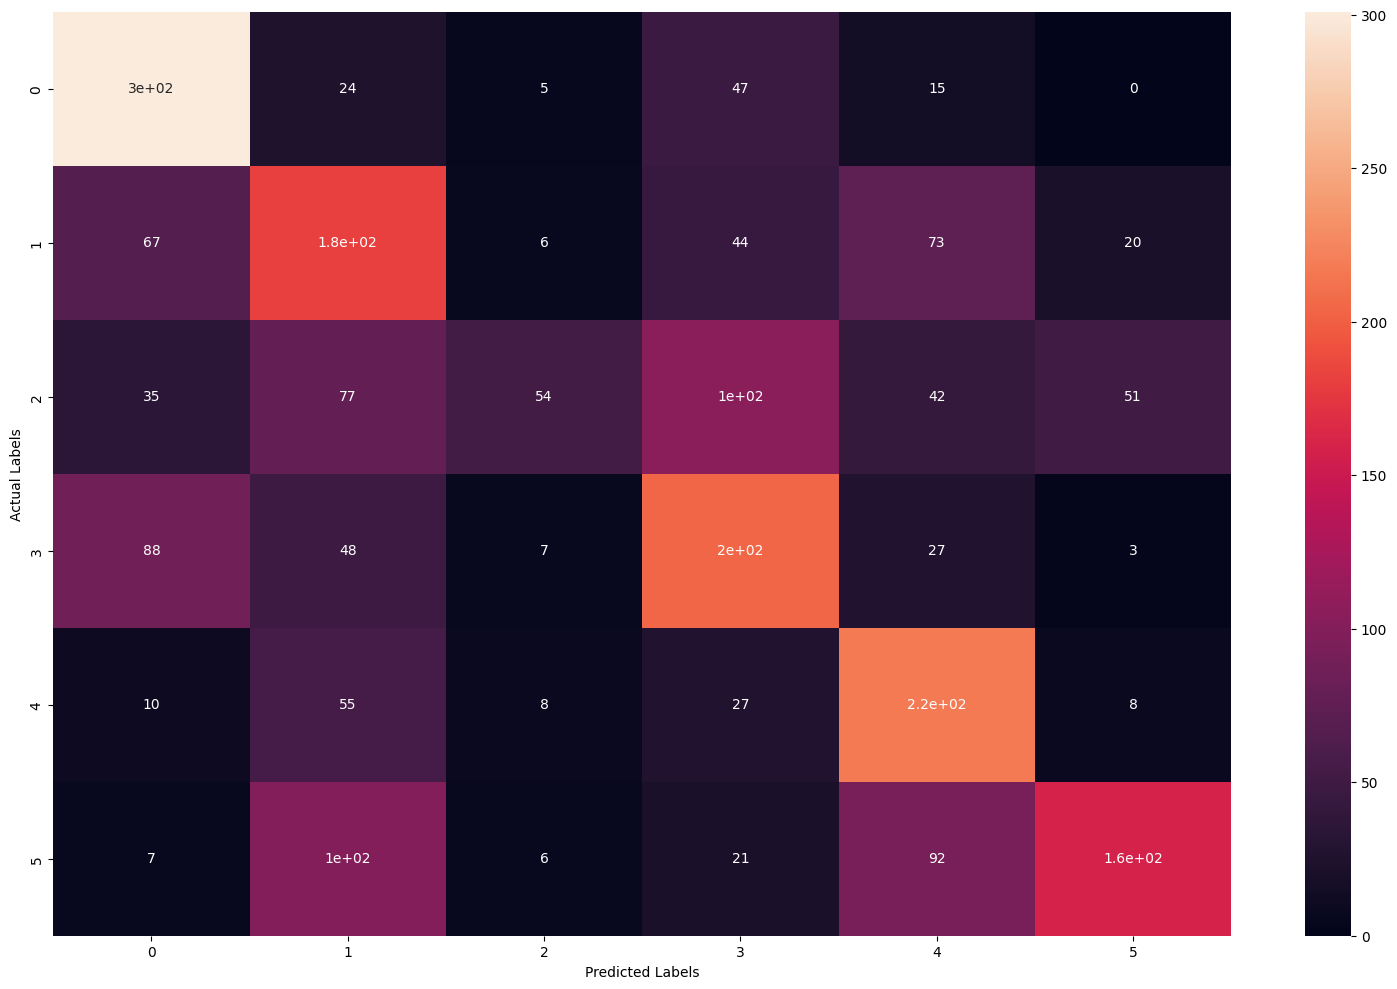

              precision    recall  f1-score   support

           0       0.59      0.77      0.67       392
           1       0.37      0.46      0.41       390
           2       0.63      0.15      0.24       363
           3       0.46      0.54      0.50       377
           4       0.47      0.67      0.55       325
           5       0.66      0.41      0.51       386

    accuracy                           0.50      2233
   macro avg       0.53      0.50      0.48      2233
weighted avg       0.53      0.50      0.48      2233



In [ ]:
Precision_F1(Label_predicted,y_test_num)

Calculate F-measure and precision and confusion matrix for Time domain or Frequency domain

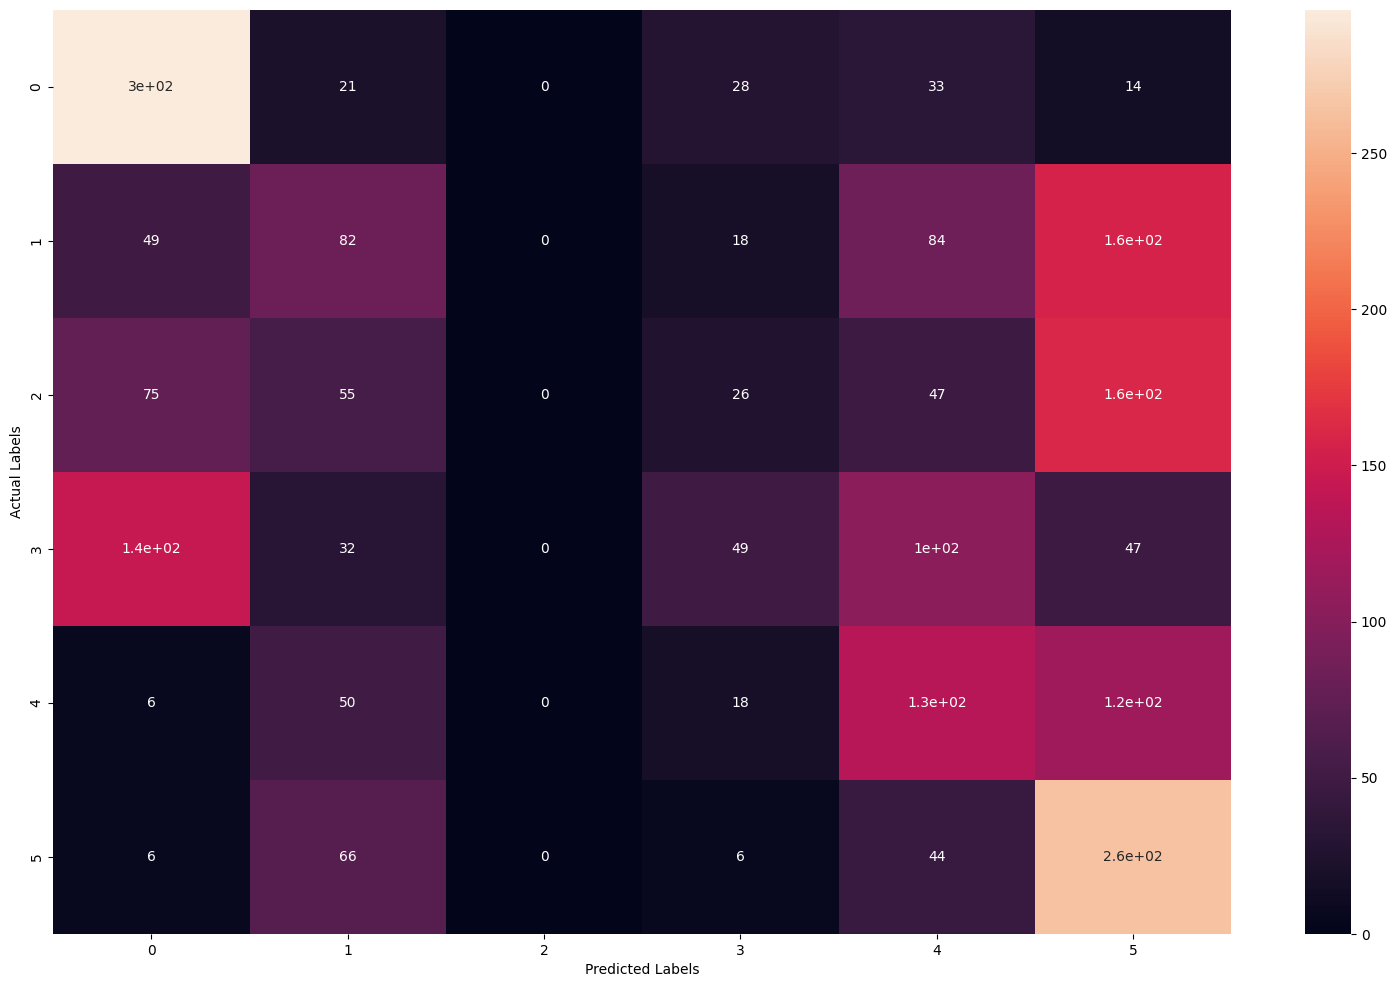

              precision    recall  f1-score   support

           0       0.51      0.76      0.61       392
           1       0.27      0.21      0.24       390
           2       0.00      0.00      0.00       363
           3       0.34      0.13      0.19       377
           4       0.30      0.41      0.35       325
           5       0.35      0.68      0.46       386

    accuracy                           0.37      2233
   macro avg       0.29      0.37      0.31      2233
weighted avg       0.30      0.37      0.31      2233



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Precision_F1(Label_predicted,y_test_num)